In [58]:
from vae.arch import VAE

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

# Interactive Tools
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider

np.set_printoptions(precision=4, suppress=True)

In [2]:
vae = VAE()
vae.set_weights('./vae/weight/model01.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [90]:
EPISODE_NB = 5

DIR_NAME = './data/vae_food/'
file = os.listdir(DIR_NAME)[EPISODE_NB]
print(file)

observations = np.load(DIR_NAME + file)['obs']
print(observations.shape)
size = observations.shape[0]

1385267.npz
(639, 64, 64, 3)


In [63]:
def animate_episode(observations):
    frames = vae.full_model.predict(observations)
    size = len(frames)
    
    for idx in range(size):
        plt.gca().cla() # clear axis

        plt.subplot(121)
        plt.imshow(observations[idx])
        plt.subplot(122)
        plt.imshow(frames[idx])

        display.clear_output(wait=True)
        display.display(plt.gcf()) 

KeyboardInterrupt: 

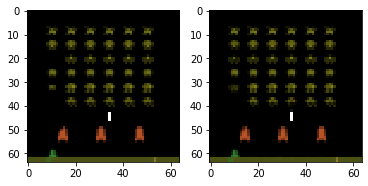

In [64]:
animate_episode(observations)

In [69]:
def slider_animation(observations):
    frames = vae.full_model.predict(observations)
    size = len(frames)

    @interact
    def animate(idx=(0, size - 1, 1)):
        plt.subplot(121)
        plt.imshow(observations[idx])
        plt.subplot(122)
        plt.imshow(frames[idx])
    
    return animate

In [70]:
slider_animation(observations);

# Visualise Mean and Variance Vectors

In [74]:
'''
Inspect the values of mu (mean) and log_var (log variance) produced by an
encoder from a speicific observation
'''

mu_lv = vae.encoder_mu_log_var.predict(np.array([observations[200]])) # 200th observation

mu      = mu_lv[0][0]
log_var = mu_lv[1][0]

print('--- mu ---')
print(mu)
print()
print('--- log_var ---')
print(log_var)

--- mu ---
[ 16.7724 -36.2575  -7.5398  -3.7288 -19.3303  -0.5769  -2.1003   0.5568
   7.4015 -13.4565   2.0162   6.0891  -3.6453  -9.4955 -12.6649 -20.9681
   2.5194  -6.6611 -13.2698 -11.9408  -3.5818   4.9799  16.0871 -19.343
 -29.1173 -18.8399  -7.0951   5.0658   7.3302   2.3458   1.3558  -2.2975
  10.2211  -9.7467   4.932    7.7874   9.9642  23.544    5.2925 -19.136
   4.781  -16.6761  28.1342  -8.7476  -2.2321 -23.3729  -6.6898 -22.7123
  -0.8581  13.0429   0.148  -12.6179  -4.2607  15.7082  11.1473  28.1471
 -21.3929  -4.9459   9.9436   1.7357   3.5532  17.8335 -22.0043   1.7315]

--- log_var ---
[-69.6671 -72.1972 -73.8161 -75.9676 -75.6504 -64.8234 -75.0282 -73.3963
 -76.6289 -72.374  -70.3326 -81.2118 -67.0692 -67.1445 -64.6605 -71.3513
 -77.676  -73.1338 -70.3196 -79.1368 -72.4606 -67.9394 -67.1115 -75.2618
 -66.6003 -69.6562 -73.0865 -69.2207 -73.0586 -71.7745 -75.1315 -70.618
 -68.6885 -75.8221 -82.1879 -72.1372 -75.3386 -70.7701 -71.5453 -73.9744
 -69.6941 -79.711  -71.58

In [83]:
'''
Find indices of highest variance
'''
indices = np.argsort(-log_var)
print(indices.tolist())

[43, 57, 14, 5, 24, 12, 22, 13, 47, 21, 62, 61, 32, 53, 50, 27, 25, 0, 40, 48, 45, 58, 49, 18, 10, 63, 31, 37, 52, 51, 15, 38, 42, 29, 35, 1, 44, 9, 20, 55, 28, 26, 17, 7, 2, 39, 60, 46, 6, 30, 23, 36, 4, 33, 59, 3, 54, 8, 56, 16, 19, 41, 11, 34]


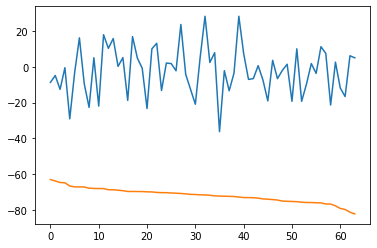

In [86]:
'''
Visualise differences in mean and variance across different latent variables
'''
plt.plot(mu[indices]); # BLUE
plt.plot(log_var[indices]); # ORANGE

In [118]:
# encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
# mu = encoded_mu_log_var[0][0]
# log_var = encoded_mu_log_var[1][0]

# lv = np.abs(log_var.copy())
# indices = np.argsort(lv)[-8:]
# print(indices)

def create_z_slider(frame_nb=100):
    obs = observations[frame_nb]
    sample = vae.encoder.predict(np.array([obs]))[0]
    log_var = vae.encoder_mu_log_var.predict(np.array([obs]))[1][0]

    indices = np.argsort(-log_var)[:8]
    print('Most significant components:', indices)
    c = (-100, 100, 20) # large step size to reduce lag on the slider

    @interact
    def z_slider(z0=c, z1=c, z2=c, z3=c, z4=c, z5=c, z6=c, z7=c): 
        
        z = sample.copy()
        
        z[indices[0]] = z0
        z[indices[1]] = z1
        z[indices[2]] = z2
        z[indices[3]] = z3
        z[indices[4]] = z4
        z[indices[5]] = z5
        z[indices[6]] = z6
        z[indices[7]] = z7
        
        image = vae.decoder.predict(np.array([z]))[0]
        plt.gca().cla()
        plt.imshow(image)
        
    return z_slider

In [119]:
create_z_slider();

Most significant components: [28 19  7 14 49  9 60 16]


interactive(children=(IntSlider(value=0, description='z0', min=-100, step=20), IntSlider(value=0, description=…